<a href="https://colab.research.google.com/github/snehalpatil2805/Fake_News_Detection_System/blob/main/Fake_News_Detecting_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##DSIP Project 1
# Project Name :- Fake News Detection System
# Name :- Snehal Vilas Patil


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv("demo.csv")

In [ ]:
df.head()

,Unnamed: 0,title,text,label,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 131,Unnamed: 132,Unnamed: 133,Unnamed: 134,Unnamed: 135,Unnamed: 136,Unnamed: 137,Unnamed: 138,Unnamed: 139,Unnamed: 140
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(6114, 4)

In [ ]:
df.isnull().sum()

Unnamed: 0    40
title         29
text          29
label         35
dtype: int64

In [ ]:
df.dropna(axis=0,inplace=True)

In [ ]:
df.shape

(6064, 4)

In [ ]:
df.reset_index(inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


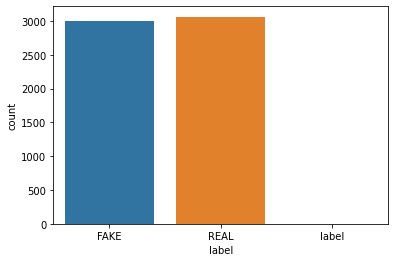

In [ ]:
sns.countplot(df['label'])

In [ ]:
data = df['title'][0]
data

'You Can Smell Hillary’s Fear'

In [ ]:
import re

In [ ]:
data = re.sub('[^a-zA-Z]',' ',data)

In [ ]:
data = data.lower()
data

'you can smell hillary s fear'

In [ ]:
list = data.split()
list

['you', 'can', 'smell', 'hillary', 's', 'fear']

In [ ]:
!pip install nltk
import nltk

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [ ]:
ps = PorterStemmer()
review = [ps.stem(word) for word in list if word not in set(stopwords.words('english'))]

In [ ]:
review

['smell', 'hillari', 'fear']

In [ ]:
' '.join(review)

'smell hillari fear'

In [ ]:
corpus = []
for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['title'][i])
    review = review.lower()
    list = review.split()
    review = [ps.stem(word) for word in list if not word in set(stopwords.words('english'))]
    corpus.append(' '.join(review))

In [ ]:
corpus[0]

'smell hillari fear'

In [ ]:
len(corpus)

6064

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
x = cv.fit_transform(corpus).toarray()

In [ ]:
x.shape

(6064, 5000)

In [ ]:
x[0]

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y = df.label

In [ ]:
y.shape

(6064,)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 0)

In [ ]:
x_train.shape

(4062, 5000)

In [ ]:
x_test.shape

(2002,)

In [ ]:
y_train.shape

(4062,)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(x_train, y_train)

MultinomialNB()

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
y_pred

array(['FAKE', 'REAL', 'REAL', ..., 'REAL', 'FAKE', 'FAKE'], dtype='<U5')

array([[758, 208],
       [143, 893]])

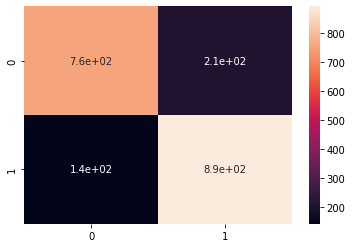

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
cm

In [ ]:
accuracy_score(y_test, y_pred)

0.8246753246753247